In [5]:
# SUV predictions
import numpy as np     #numpy use for deals with arrays.
import matplotlib.pyplot as plt  #matplotlib use for  creating static, animated, and interactive visualizations in Python.
import pandas as pd   #pandas use for data sets.
# %matplotlib inline  # holding lot of libraay
import seaborn as sns #seaborn use for a Data Visualization library with a wide variety of wonderful styles and features for statistical plotting.  


In [6]:
from sklearn import model_selection  #sklearn use for implement machine learning models and statistical modelling
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score             #parametres.. 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler          #data series me hai .


In [7]:
dataset=pd.read_csv("F:\data\suv_data.csv")
dataset.head(10)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [8]:
dataset.shape

(400, 5)

In [9]:

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
dataset.groupby ('Purchased').size()


Purchased
0    257
1    143
dtype: int64

In [11]:
# dropping column from dataset
cleaned_data_set = dataset.drop (columns = ['User ID'], axis = '1')
cleaned_data_set.head ()


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
# details of new dataset
cleaned_data_set.describe ()


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

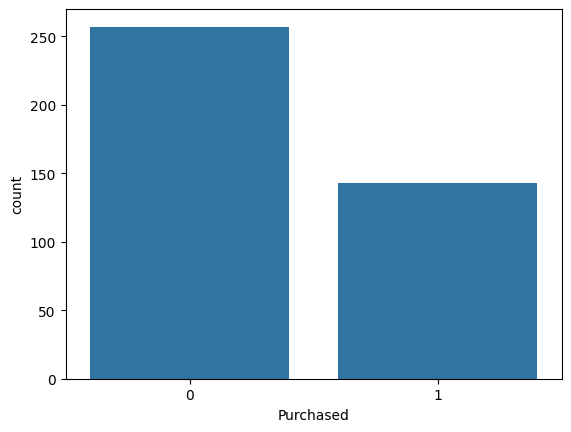

In [13]:
# Visualizing Data
sns.countplot (x = 'Purchased', data = cleaned_data_set)


<Axes: xlabel='Purchased', ylabel='count'>

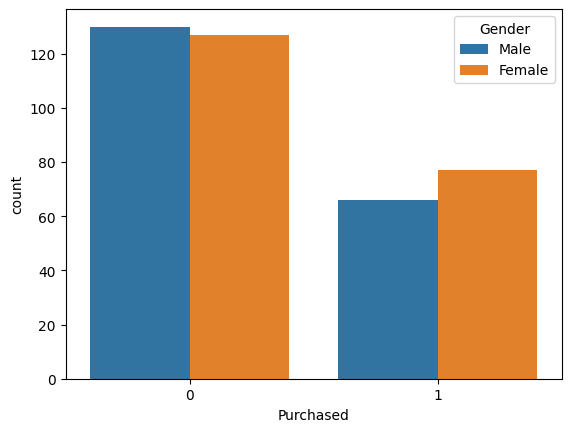

In [14]:
# Another Visualization
sns.countplot ( x = 'Purchased', hue = 'Gender', data = cleaned_data_set)


<Axes: >

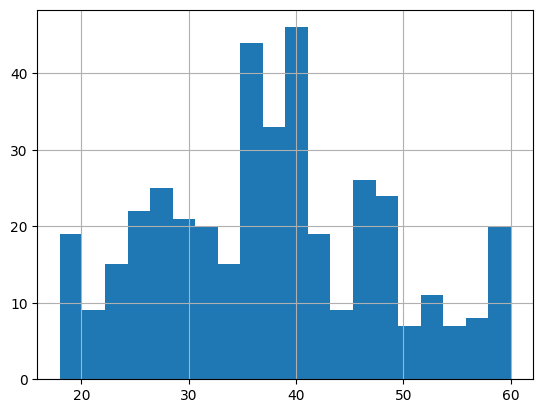

In [15]:
dataset ['Age'].hist(bins = 20)


In [16]:
# Adding conditional column   
age_category = []
for i in range (0, len  (dataset ['Age'])):
    if cleaned_data_set ['Age'][i] <= 20:
        age_category.append ('A');
    elif 20 < cleaned_data_set ['Age'][i] <= 26:
        age_category.append ('B');
    elif 26 < cleaned_data_set ['Age'][i] <= 30:
        age_category.append ('C');
    elif 30 < cleaned_data_set ['Age'][i] <= 40:
        age_category.append ('D');
    elif 40 < cleaned_data_set ['Age'][i] <= 50:
        age_category.append ('E');
    else:
        age_category.append ('F');

age_data_frame = pd.DataFrame (data = age_category, columns = ['AgeCategory'])
augmented_data_set = pd.concat([cleaned_data_set, age_data_frame], axis = 1)
augmented_data_set.head()


,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A
1,Male,35,20000,0,D
2,Female,26,43000,0,B
3,Female,27,57000,0,C
4,Male,19,76000,0,A


<Axes: xlabel='Purchased', ylabel='count'>

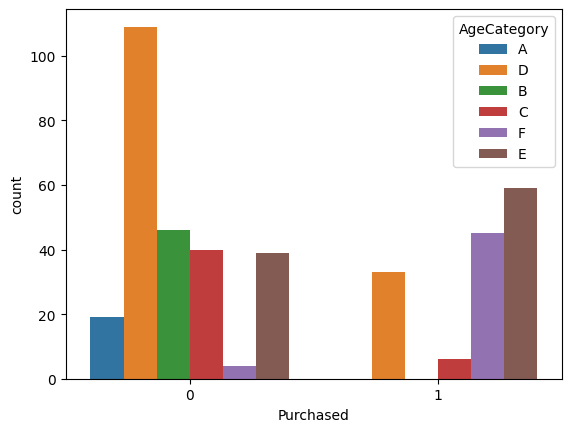

In [17]:
sns.countplot ( x = 'Purchased', hue = 'AgeCategory', data = augmented_data_set)

<Axes: >

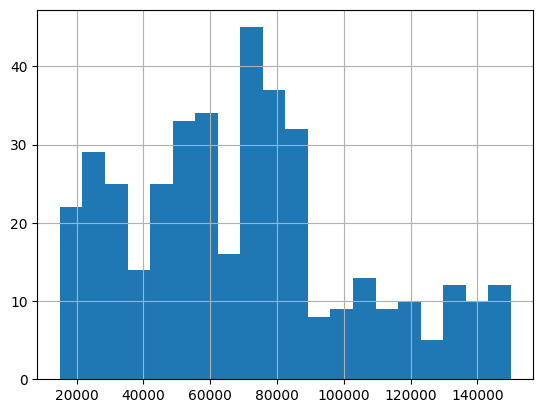

In [18]:
dataset ['EstimatedSalary'].hist(bins = 20)


In [19]:
# Adding another column income category
income_category = []
for i in range (0, len  (dataset ['EstimatedSalary'])):
    if cleaned_data_set ['EstimatedSalary'][i] <= 19500:
        income_category.append ('Very Low');
    elif 19500 < cleaned_data_set ['EstimatedSalary'][i] <= 40000:
        income_category.append ('Low');
    elif 40000 < cleaned_data_set ['EstimatedSalary'][i] <= 60000:
        income_category.append ('Moderately Low');
    elif 60000 < cleaned_data_set ['EstimatedSalary'][i] <= 80000:
        income_category.append ('Medium');
    elif 80000 < cleaned_data_set ['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < cleaned_data_set ['EstimatedSalary'][i] <= 130000:
        income_category.append ('Very High');
    elif 130000 < cleaned_data_set ['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');
income_data_frame = pd.DataFrame (data = income_category, columns = ['IncomeCategory'])
augmented_data_set_2 = pd.concat([augmented_data_set, income_data_frame], axis = 1)
augmented_data_set_2.head()



,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,D,Low
2,Female,26,43000,0,B,Moderately Low
3,Female,27,57000,0,C,Moderately Low
4,Male,19,76000,0,A,Medium


<Axes: xlabel='Purchased', ylabel='count'>

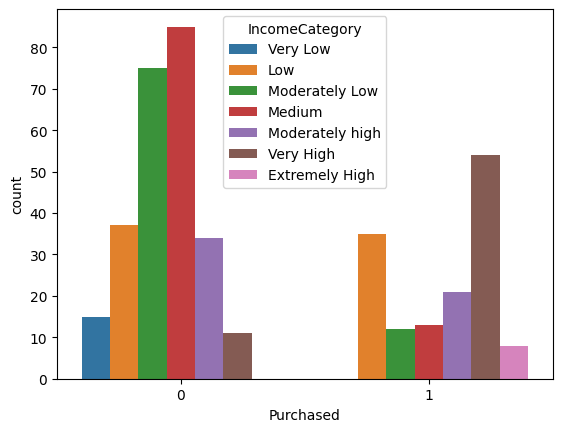

In [20]:
# Visualize data with new added column
sns.countplot ( x = 'Purchased', hue = 'IncomeCategory', data = augmented_data_set_2)


In [21]:
# Binary data conversion by converting Gender Male data to 1 column
binary_gender = pd.get_dummies (augmented_data_set_2 ['Gender'],drop_first = True)
binary_gender.head ()


,Male
0,True
1,True
2,False
3,False
4,True


In [22]:

# Binary data conversion for another columns
binary_age = pd.get_dummies (augmented_data_set_2 ['AgeCategory'])
binary_age.head ()
binary_income = pd.get_dummies (augmented_data_set_2 ['IncomeCategory'])
binary_income.head ()


,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False


In [23]:
# Creating final data set
final_data_set  = pd.concat ([augmented_data_set_2, binary_age, binary_gender, binary_income], axis = 1)
final_data_set.head()


,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,Male,19,19000,0,A,Very Low,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,Male,35,20000,0,D,Low,False,False,False,True,False,False,True,False,True,False,False,False,False,False
2,Female,26,43000,0,B,Moderately Low,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,Female,27,57000,0,C,Moderately Low,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,Male,19,76000,0,A,Medium,True,False,False,False,False,False,True,False,False,True,False,False,False,False


In [24]:
final_data_set_1 = final_data_set.drop (columns = ['Age', 'Gender', 'EstimatedSalary', 'IncomeCategory', 'AgeCategory'], axis = 1)
final_data_set_1.head ()


,Purchased,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,0,False,False,False,True,False,False,True,False,True,False,False,False,False,False
2,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,0,True,False,False,False,False,False,True,False,False,True,False,False,False,False


In [25]:
#moduling
Y = final_data_set_1 ['Purchased']
X = final_data_set_1.drop (columns = ['Purchased'], axis = 1)

X.head()

Y.head()




0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [26]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)
model = LogisticRegression (solver = 'liblinear')
model.fit (X_train, Y_train)


LogisticRegression(solver='liblinear')

In [27]:
# Prediction, Confusion Matrix, Accuracy score
predictions = model.predict (X_test)
report = classification_report (Y_test, predictions)
print (report)

print (confusion_matrix (Y_test, predictions))
accuracy_score (Y_test, predictions)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80

[[56  2]
 [ 2 20]]


0.95

In [28]:
X= dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=0)
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


LogisticRegression(random_state=0)

In [29]:
y_pred=classifier.predict(X_test)
y_pred

y_test

# Accuracy Score
print ('Accuracy Score')
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100


Accuracy Score


87.12121212121212

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[78,  6],
       [11, 37]], dtype=int64)

<Axes: >

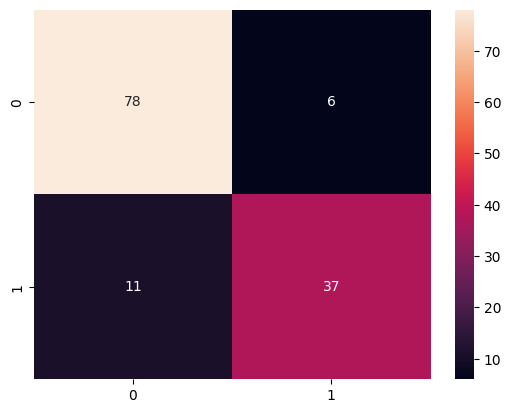

In [31]:
# plot confusion matrix
sns.heatmap(cm,annot=True)
